In [2]:
###---IMPORT LIBRARY---###

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


In [4]:
###---DATA PREPROCESSING---###

In [5]:
def readFileCSV(filePath):
    df = pd.read_csv(filePath)
    return df

df = readFileCSV("HR dataset.csv")
print(df.head()) 

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
###---DATA VISUALIZATION---###

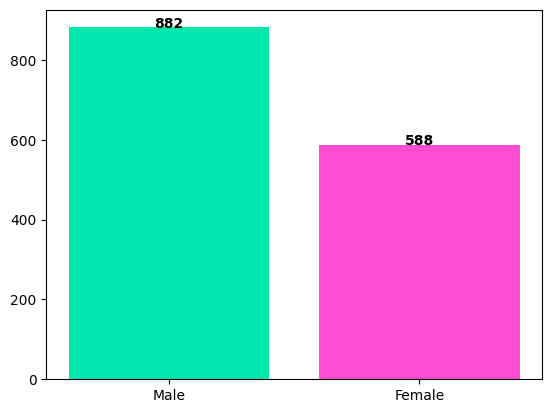

In [10]:
x = df['Gender'].value_counts()
colors = ['#00e6ac', '#ff4dd2']

plt.bar(x.index, x.values, color=colors)

for i, v in enumerate(x.values):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')

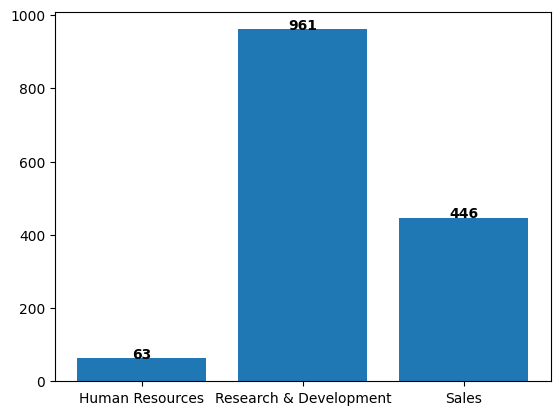

In [11]:
x = df['EmployeeNumber'].groupby(df['Department']).count()
# colors = ['#4d79ff', '#ff1a75', '#a31aff']

plt.bar(x.index, x.values)

for i, v in enumerate(x.values):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')

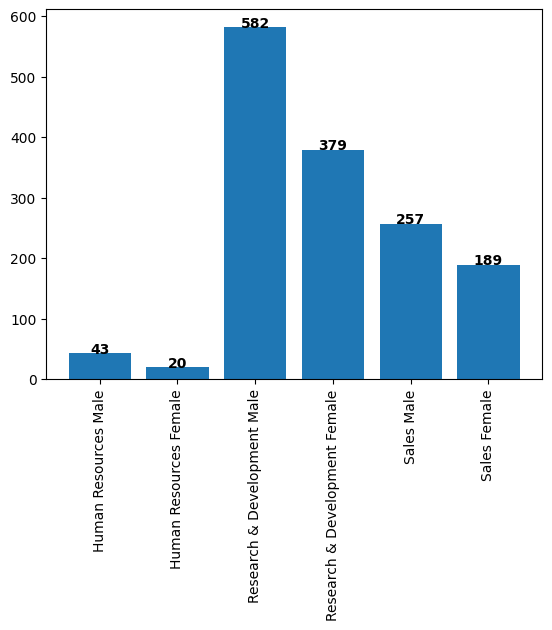

In [12]:
x = df['Gender'].groupby(df['Department']).value_counts()

labels = x.index.map(lambda label: ' '.join(label))

plt.bar(labels, x.values)
plt.xticks(rotation=90)

for i, v in enumerate(x.values):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')

(array([ 28.,  29.,  40.,  65.,  96., 128., 130., 135., 147., 108., 139.,
         78.,  74.,  57.,  43.,  49.,  37.,  40.,  18.,  29.]),
 array([18. , 20.1, 22.2, 24.3, 26.4, 28.5, 30.6, 32.7, 34.8, 36.9, 39. ,
        41.1, 43.2, 45.3, 47.4, 49.5, 51.6, 53.7, 55.8, 57.9, 60. ]),
 <BarContainer object of 20 artists>)

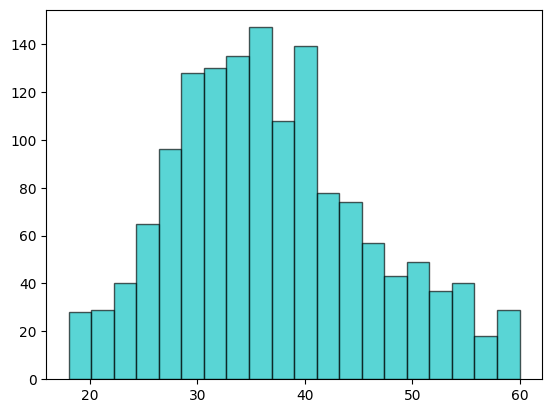

In [13]:
x = df['Age']

plt.hist(x, bins=20, color='c', edgecolor='k', alpha=0.65)

(array([208., 211.,  84.,  64.,  65.,  59.,  84.,  80.,  85.,  86.,  29.,
         20.,  19.,  21.,   0.,  26.,  32.,  20.,  26.,  22.,  25.,  18.,
         19.,  27.,  28.,  25.,  25.,  12.,  23.,  27.]),
 array([ 1.        ,  1.93333333,  2.86666667,  3.8       ,  4.73333333,
         5.66666667,  6.6       ,  7.53333333,  8.46666667,  9.4       ,
        10.33333333, 11.26666667, 12.2       , 13.13333333, 14.06666667,
        15.        , 15.93333333, 16.86666667, 17.8       , 18.73333333,
        19.66666667, 20.6       , 21.53333333, 22.46666667, 23.4       ,
        24.33333333, 25.26666667, 26.2       , 27.13333333, 28.06666667,
        29.        ]),
 <BarContainer object of 30 artists>)

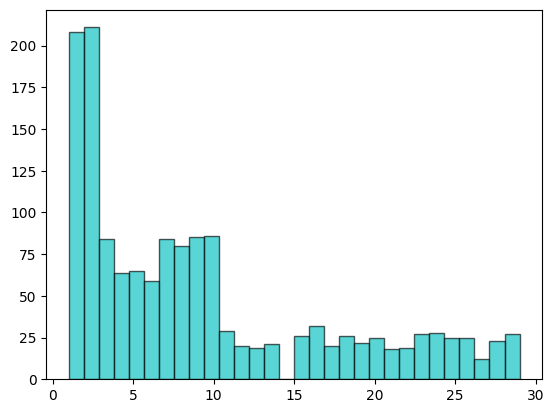

In [14]:
x = df['DistanceFromHome']

plt.hist(x, bins=30, color='c', edgecolor='k', alpha=0.65)

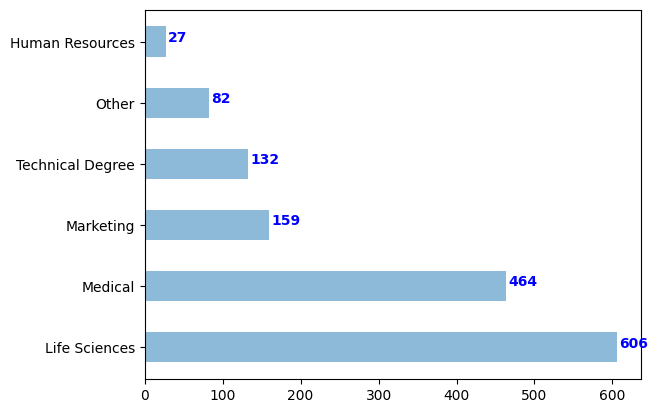

In [15]:
x = df['EducationField'].value_counts()
plt.barh(x.index, x.values, height=0.5, align='center', alpha=0.5)
for i, v in enumerate(x.values):
    plt.text(v + 3, i, str(v), color='blue', fontweight='bold')

In [16]:
avgJobSatisfaction = df['JobSatisfaction'].groupby(df['JobRole']).mean().round(2)
print(avgJobSatisfaction)

JobRole
Healthcare Representative    2.79
Human Resources              2.56
Laboratory Technician        2.69
Manager                      2.71
Manufacturing Director       2.68
Research Director            2.70
Research Scientist           2.77
Sales Executive              2.75
Sales Representative         2.73
Name: JobSatisfaction, dtype: float64


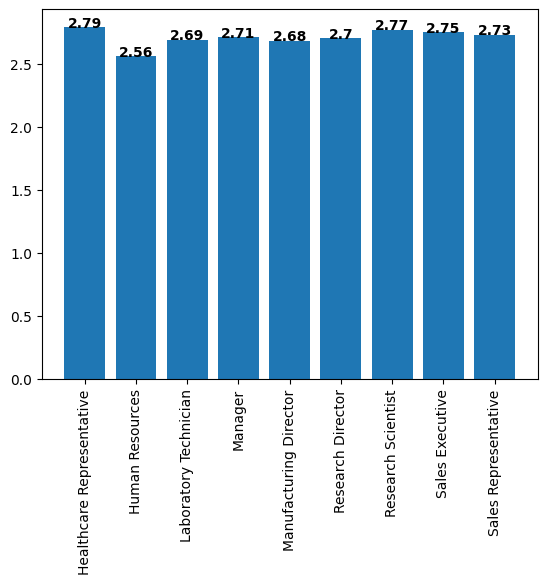

In [17]:
x = df.groupby('JobRole')['JobSatisfaction'].mean().round(2)
plt.bar(x.index, x.values, label='Job Satisfaction')
plt.xticks(rotation=90)
for i, v in enumerate(x.values):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')

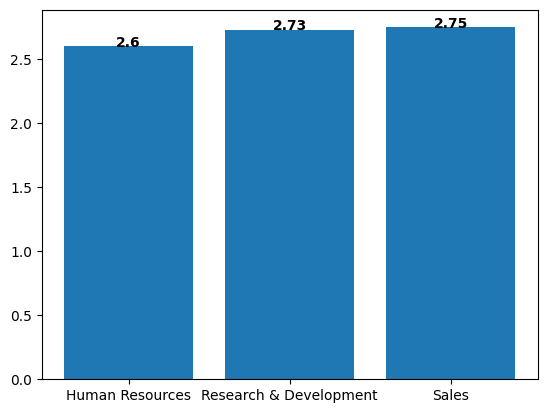

In [18]:
x = df.groupby('Department')['JobSatisfaction'].mean().round(2)
plt.bar(x.index, x.values, label='Job Satisfaction')
for i, v in enumerate(x.values):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')

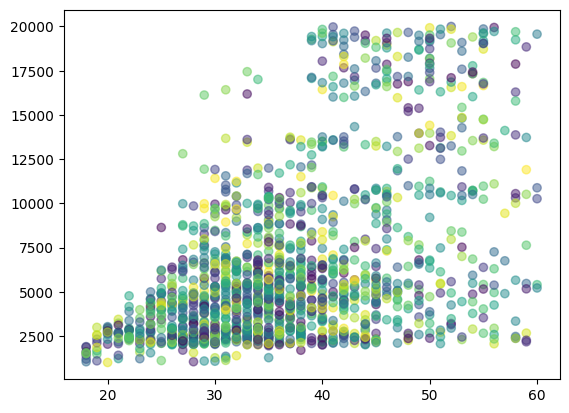

In [19]:
x = df['Age']
y = df['MonthlyIncome']
color = np.random.rand(len(x))

plt.scatter(x, y, alpha=0.5, c=color)

([<matplotlib.patches.Wedge at 0x29d552dfed0>,
 [Text(-1.0493363707830166, 0.5821453263163142, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')],
 [Text(-0.6121128829567596, 0.33958477368451656, '83.9%'),
  Text(0.5246681853915082, -0.2910726631581571, '16.1%')])

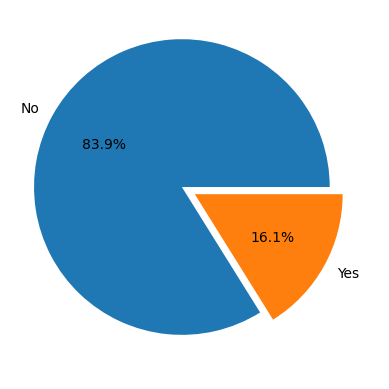

In [20]:
x = df['Attrition'].value_counts().convert_dtypes(int)
xExplode = (0.1, 0)
dataLabels = ['No', 'Yes']

plt.pie(x, explode=xExplode, autopct='%1.1f%%', labels=dataLabels)

In [21]:
###---QUERY---###

In [22]:
maleAttYes = df[(df['Gender'] == 'Male') & (df['Attrition'] == 'Yes')]
print(maleAttYes)

      Age Attrition     BusinessTravel  DailyRate              Department  \
2      37       Yes      Travel_Rarely       1373  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
24     34       Yes      Travel_Rarely        699  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
...   ...       ...                ...        ...                     ...   
1438   23       Yes  Travel_Frequently        638                   Sales   
1442   29       Yes      Travel_Rarely       1092  Research & Development   
1444   56       Yes      Travel_Rarely        310  Research & Development   
1452   50       Yes  Travel_Frequently        878                   Sales   
1461   50       Yes      Travel_Rarely        410                   Sales   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
2    

In [23]:
maleAttYes = df[(df['Gender'] == 'Male') & (df['Attrition'] == 'Yes')]
print(maleAttYes)

      Age Attrition     BusinessTravel  DailyRate              Department  \
2      37       Yes      Travel_Rarely       1373  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
24     34       Yes      Travel_Rarely        699  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
...   ...       ...                ...        ...                     ...   
1438   23       Yes  Travel_Frequently        638                   Sales   
1442   29       Yes      Travel_Rarely       1092  Research & Development   
1444   56       Yes      Travel_Rarely        310  Research & Development   
1452   50       Yes  Travel_Frequently        878                   Sales   
1461   50       Yes      Travel_Rarely        410                   Sales   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
2    

In [24]:
maleYesSales = df[(df['Gender'] == 'Male') & (df['Attrition'] == 'Yes') & (df['Department'] == 'Sales')]
selectedColumns = maleYesSales[['Age','Attrition','Department']]
print(selectedColumns)

      Age Attrition Department
21     36       Yes      Sales
33     39       Yes      Sales
36     50       Yes      Sales
89     46       Yes      Sales
107    25       Yes      Sales
124    31       Yes      Sales
127    19       Yes      Sales
210    32       Yes      Sales
293    26       Yes      Sales
366    41       Yes      Sales
368    40       Yes      Sales
378    34       Yes      Sales
457    18       Yes      Sales
469    32       Yes      Sales
480    30       Yes      Sales
482    31       Yes      Sales
495    27       Yes      Sales
528    50       Yes      Sales
573    26       Yes      Sales
608    55       Yes      Sales
683    25       Yes      Sales
688    19       Yes      Sales
693    36       Yes      Sales
695    37       Yes      Sales
748    26       Yes      Sales
791    35       Yes      Sales
801    50       Yes      Sales
838    42       Yes      Sales
911    25       Yes      Sales
946    40       Yes      Sales
947    52       Yes      Sales
975    5

In [25]:
top5MonthlyIncome = df.nlargest(5, 'MonthlyIncome')
selectedColumns = top5MonthlyIncome[['EmployeeNumber','Age','MonthlyIncome','Department']]
print(selectedColumns)

     EmployeeNumber  Age  MonthlyIncome              Department
190             259   52          19999  Research & Development
746            1035   41          19973  Research & Development
851            1191   56          19943  Research & Development
165             226   50          19926  Research & Development
568             787   55          19859  Research & Development


In [26]:
bottom5MonthlyIncome = df.nsmallest(5, 'MonthlyIncome')
selectedColumns = bottom5MonthlyIncome[['EmployeeNumber','Age','MonthlyIncome','Department']]
print(selectedColumns)

      EmployeeNumber  Age  MonthlyIncome              Department
513              701   20           1009  Research & Development
727             1012   18           1051  Research & Development
764             1056   28           1052                   Sales
1338            1876   30           1081                   Sales
1365            1928   29           1091                   Sales


In [27]:
###---MACHINE LEARNING---###    

In [28]:
df = readFileCSV("HR dataset.csv")

Accuracy: 86.17%


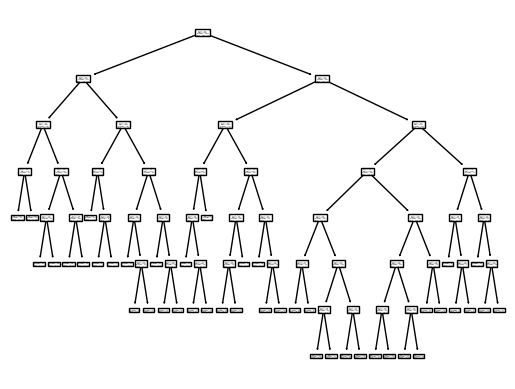

In [29]:
#DECISION TREE
convertAttrition = {'Yes': 1, 'No': 0}
df['Attrition'].dtype
df['Attrition'] = df['Attrition'].map(convertAttrition)
# print(df['Attrition'])

age_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['Age_discrete'] = age_discretizer.fit_transform(df[['Age']])

income_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df['MonthlyIncome_discrete'] = income_discretizer.fit_transform(df[['MonthlyIncome']])

hourlyrate_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
df['HourlyRate_discrete'] = hourlyrate_discretizer.fit_transform(df[['HourlyRate']])

features = ['Age_discrete', 'HourlyRate_discrete', 'MonthlyIncome_discrete']

x = df[features]
y = df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# print(y)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

tree.plot_tree(dtree)

y_pred = dtree.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

k = 1, Accuracy: 73.70%
k = 3, Accuracy: 81.86%
k = 5, Accuracy: 83.67%
k = 7, Accuracy: 84.35%
k = 9, Accuracy: 83.67%
k = 11, Accuracy: 84.81%
k = 13, Accuracy: 85.26%
k = 15, Accuracy: 85.94%
k = 17, Accuracy: 85.71%
k = 19, Accuracy: 85.71%
k = 21, Accuracy: 85.49%
k = 23, Accuracy: 85.71%
k = 25, Accuracy: 85.94%
k = 27, Accuracy: 86.17%
k = 29, Accuracy: 86.17%
k = 31, Accuracy: 86.17%
k = 33, Accuracy: 86.17%
k = 35, Accuracy: 86.17%
k = 37, Accuracy: 86.17%
k = 39, Accuracy: 86.17%
k = 41, Accuracy: 86.17%
k = 43, Accuracy: 86.17%
k = 45, Accuracy: 86.17%
k = 47, Accuracy: 86.17%
k = 49, Accuracy: 86.17%
k = 51, Accuracy: 86.17%
k = 53, Accuracy: 86.17%
k = 55, Accuracy: 86.17%
k = 57, Accuracy: 86.17%
k = 59, Accuracy: 86.17%
k = 61, Accuracy: 86.17%
k = 63, Accuracy: 86.17%
k = 65, Accuracy: 86.17%
k = 67, Accuracy: 86.17%
k = 69, Accuracy: 86.17%
k = 71, Accuracy: 86.17%
k = 73, Accuracy: 86.17%
k = 75, Accuracy: 86.17%
k = 77, Accuracy: 86.17%
k = 79, Accuracy: 86.17%
k = 8

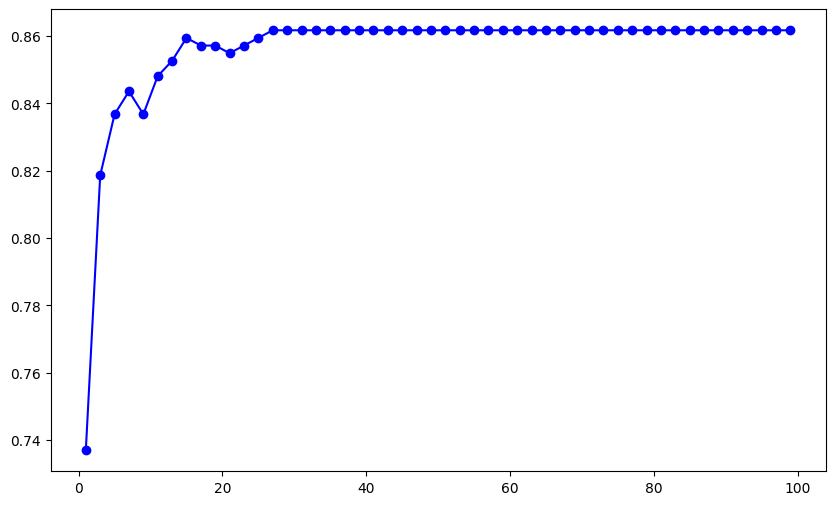

In [37]:
#K-NN CLASSIFIER
x = df[['Age', 'MonthlyIncome', 'JobSatisfaction']]  
y = df['Attrition']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

accuracies = []

for k in range(1, 100, 2):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"k = {k}, Accuracy: {accuracy * 100:.2f}%")
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 100, 2), accuracies, marker='o', linestyle='-', color='b')


Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

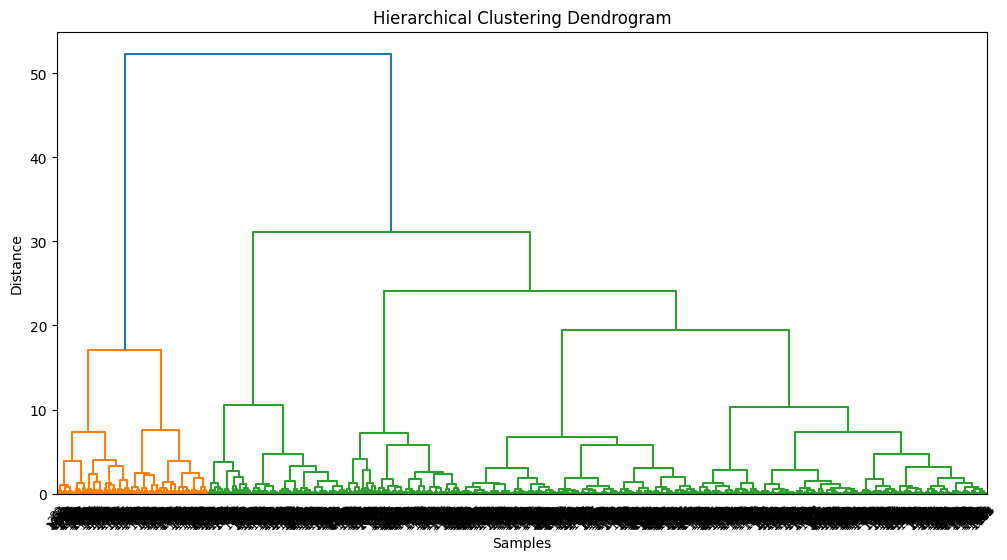

In [31]:
features = ['Age', 'MonthlyIncome']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

linkage_matrix = linkage(df[features], method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, p=30, truncate_mode='level', leaf_rotation=45., leaf_font_size=8., show_contracted=True)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')